Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

<span style="font-size:24px; font-weight:bold">Packages</span>

In [24]:
# Import essential libraries for data manipulation and analysis
import numpy as np                                  # For numerical operations
import pandas as pd                                 # For data manipulation and analysis

# Import visualization libraries
import matplotlib.pyplot as plt                     # For creating static visualizations
import seaborn as sns                               # For enhanced statistical visualizations

# Import preprocessing tools
from sklearn.preprocessing import MinMaxScaler      # For feature scaling between 0 and 1
from sklearn.preprocessing import StandardScaler    # For standardizing features (mean=0, std=1)

# Import model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report  # For model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay   # For model evaluation and visualization

# Import machine learning models
# Note: xgboost needs to be installed separately with: pip install xgboost
from xgboost import XGBClassifier                   # Gradient boosting implementation
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision tree classifier and visualization
from sklearn.naive_bayes import GaussianNB          # Gaussian Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors classifier
from sklearn.svm import SVC                         # Support Vector Machine classifier
from sklearn.neural_network import MLPClassifier    # Multi-layer Perceptron neural network
from sklearn.linear_model import LogisticRegression # Logistic regression classifier (imported twice in original code)
from sklearn.ensemble import RandomForestClassifier # Random forest ensemble classifier

# Import model selection and validation tools
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.model_selection import GridSearchCV, cross_val_score  # For hyperparameter tuning and cross-validation

# Import dimensionality reduction
from sklearn.decomposition import PCA               # Principal Component Analysis
from xgboost import XGBClassifier


## Data Preparation

In [28]:
dfMat = pd.read_excel("student_mat_cleaned.xlsx")
dfPor = pd.read_excel("student_portuguese_cleaned.xlsx")


df = pd.concat([dfMat, dfPor])

In [29]:
pd.set_option('display.max_columns', None)


In [32]:
df.head(600)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,GP,M,16,U,GT3,T,1,2,services,services,other,mother,1,1,0,no,yes,no,yes,yes,yes,yes,yes,3,3,3,1,2,3,0,10,9,11
201,GP,M,16,U,LE3,T,2,1,other,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,2,3,1,2,5,0,13,14,16
202,GP,F,17,U,GT3,A,3,3,health,other,reputation,mother,1,2,0,no,yes,no,no,no,yes,yes,yes,3,3,3,1,3,3,10,12,13,14
203,GP,M,17,R,GT3,T,1,2,at_home,other,home,mother,1,2,0,no,no,no,no,yes,yes,no,no,3,1,3,1,5,3,6,9,9,10


In [34]:
# dataset has 1044 rows and 33 columns
df.shape

(1044, 33)

<span style="font-size:25px; font-weight:bold">Missing Valuess ??</span>

In [37]:
print("\nMissing Values (True = Missing):")
print(df.isnull())


Missing Values (True = Missing):
     school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
644   False  False  False    False    False    False  False  False  False   
645   False  False  False    False    False    False  False  False  False   
646   False  False  False    False    False    False  False  False  False   
647   False  False  False    False    False    False  False  False  False   
648   False  False  False    False    False    False  False  False  False   

      Fjob  reason  guardian  traveltime 

In [39]:
print("\nMissing Values Per Feature:")
print(df.isnull().sum())


Missing Values Per Feature:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [41]:
print("\nTotal Missing Values in the Dataset:")
print(df.isnull().sum().sum())


Total Missing Values in the Dataset:
0


In [43]:
# dataset doesn't have missing values
df.isnull().values.any()

np.False_

<span style="font-size:24px; font-weight:bold">Attributes Types</span>

In [46]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

<span style="font-size:24px; font-weight:bold">Central Tendency </span>

In [49]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]
summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

print(summary)

                 Mean  Median    Mode
Dalc         1.494253     1.0       1
Fedu         2.387931     2.0       2
Fjob              NaN     NaN   other
G1          11.213602    11.0      10
G2          11.246169    11.0      11
G3          11.341954    11.0      10
Medu         2.603448     3.0       4
Mjob              NaN     NaN   other
Pstatus           NaN     NaN       T
Walc         2.284483     2.0       1
absences     4.434866     2.0       0
activities        NaN     NaN      no
address           NaN     NaN       U
age         16.726054    17.0      16
failures     0.264368     0.0       0
famrel       3.935824     4.0       4
famsize           NaN     NaN     GT3
famsup            NaN     NaN     yes
freetime     3.201149     3.0       3
goout        3.156130     3.0       3
guardian          NaN     NaN  mother
health       3.543103     4.0       5
higher            NaN     NaN     yes
internet          NaN     NaN     yes
nursery           NaN     NaN     yes
paid        

<span style="font-size:24px; font-weight:bold">Skewness! </span>

In [52]:
def calculate_skew_type(mean, median):
    if mean > median :
        return "Positive Skewed"
    elif mean < median:
        return "Negative Skewed"
    else:
        return "Symmetric"

skew_results = {}
for column in df.select_dtypes(include=['number']).columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    skew_type = calculate_skew_type(mean_value, median_value)
    skew_results[column] = {'Mean': mean_value, 'Median': median_value, 'Skewness Type': skew_type}

for column, values in skew_results.items():
    print(f"{column}: Mean = {values['Mean']}, Median = {values['Median']}, Skewness = {values['Skewness Type']}")


age: Mean = 16.726053639846743, Median = 17.0, Skewness = Negative Skewed
Medu: Mean = 2.603448275862069, Median = 3.0, Skewness = Negative Skewed
Fedu: Mean = 2.3879310344827585, Median = 2.0, Skewness = Positive Skewed
traveltime: Mean = 1.5229885057471264, Median = 1.0, Skewness = Positive Skewed
studytime: Mean = 1.9703065134099618, Median = 2.0, Skewness = Negative Skewed
failures: Mean = 0.26436781609195403, Median = 0.0, Skewness = Positive Skewed
famrel: Mean = 3.935823754789272, Median = 4.0, Skewness = Negative Skewed
freetime: Mean = 3.2011494252873565, Median = 3.0, Skewness = Positive Skewed
goout: Mean = 3.1561302681992336, Median = 3.0, Skewness = Positive Skewed
Dalc: Mean = 1.4942528735632183, Median = 1.0, Skewness = Positive Skewed
Walc: Mean = 2.2844827586206895, Median = 2.0, Skewness = Positive Skewed
health: Mean = 3.543103448275862, Median = 4.0, Skewness = Negative Skewed
absences: Mean = 4.434865900383142, Median = 2.0, Skewness = Positive Skewed
G1: Mean = 11

<span style="font-size:24px; font-weight:bold">---------------------------------- </span>


`<span style="font-size:24px; font-weight:bold">Quantiles</span>

In [56]:
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers ")
  

age: 2 outliers 
Medu: 0 outliers 
Fedu: 0 outliers 
traveltime: 24 outliers 
studytime: 62 outliers 
failures: 183 outliers 
famrel: 77 outliers 
freetime: 64 outliers 
goout: 0 outliers 
Dalc: 52 outliers 
Walc: 0 outliers 
health: 0 outliers 
absences: 54 outliers 
G1: 1 outliers 
G2: 20 outliers 
G3: 54 outliers 


In [58]:
import pandas as pd
import numpy as np

# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Calculate IQR bounds for each column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# 3. Identify rows WITHOUT outliers (in any numeric column)
rows_without_outliers = numeric_df[
    ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
]

# 4. Count results
rows_remaining = len(rows_without_outliers)
numeric_attributes = len(numeric_df.columns)

print(f"Shape after outlier removal: ({rows_remaining}, {numeric_attributes})")

Shape after outlier removal: (626, 16)


In [60]:
Q1 = df[['age','Medu','Fedu','traveltime' , 'studytime' , 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']].quantile(0.25)
Q3 = df[['age','Medu','Fedu','traveltime' , 'studytime' , 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']].quantile(0.75)
IQR = Q3-Q1
print(IQR)

age           2.0
Medu          2.0
Fedu          2.0
traveltime    1.0
studytime     1.0
failures      0.0
famrel        1.0
freetime      1.0
goout         2.0
Dalc          1.0
Walc          2.0
health        2.0
absences      6.0
G1            4.0
G2            4.0
G3            4.0
dtype: float64


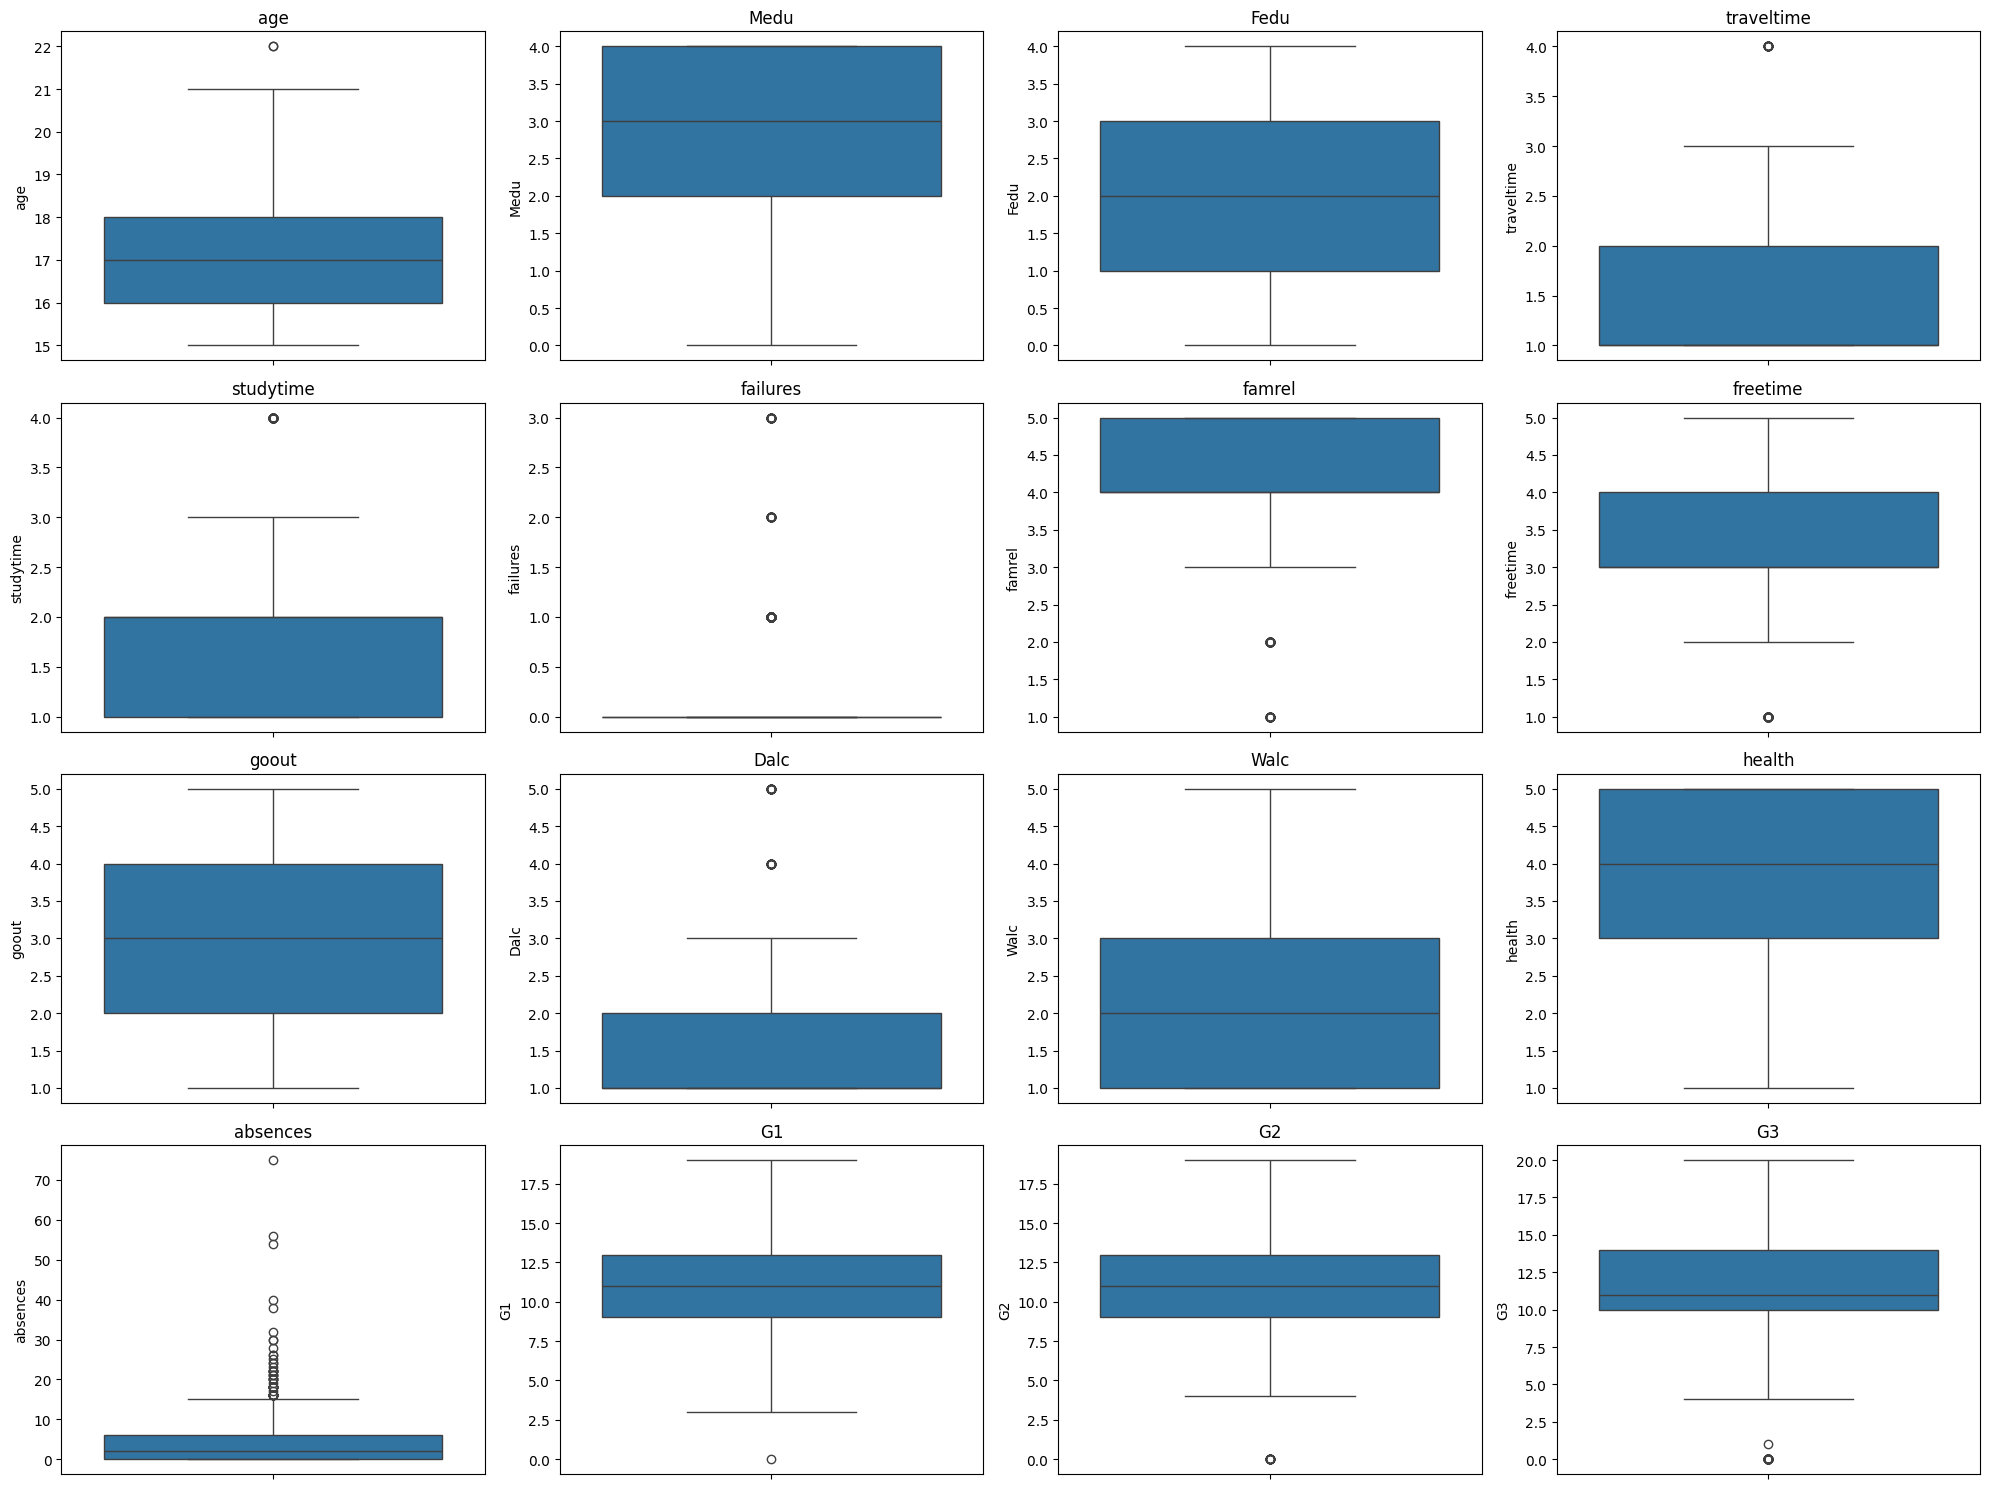

In [62]:
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
numeric_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [63]:
for col in numeric_df.columns:
    print(f"Statistics for {col}:")
    print(numeric_df[col].describe())
    print("\n")

Statistics for age:
count    1044.000000
mean       16.726054
std         1.239975
min        15.000000
25%        16.000000
50%        17.000000
75%        18.000000
max        22.000000
Name: age, dtype: float64


Statistics for Medu:
count    1044.000000
mean        2.603448
std         1.124907
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Medu, dtype: float64


Statistics for Fedu:
count    1044.000000
mean        2.387931
std         1.099938
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Fedu, dtype: float64


Statistics for traveltime:
count    1044.000000
mean        1.522989
std         0.731727
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: traveltime, dtype: float64


Statistics for studytime:
count    1044.000000
mean        1.970307
std         0.834353
min         1.000000
25%     

<span style="font-size:24px; font-weight:bold">Describe</span>

<span style="font-size:24px; font-weight:bold">Normalization</span>

In [68]:
scaler = MinMaxScaler()
columns_to_normalize = ['age','Medu','Fedu','traveltime' , 'studytime' , 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
df[[col + '_norm' for col in columns_to_normalize]] = scaler.fit_transform(df[columns_to_normalize])

In [70]:
df[[col + '_norm' for col in ['age','Medu','Fedu','traveltime' , 'studytime' , 'failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]].head(648)

,age_norm,Medu_norm,Fedu_norm,traveltime_norm,studytime_norm,failures_norm,famrel_norm,freetime_norm,goout_norm,Dalc_norm,Walc_norm,health_norm,absences_norm,G1_norm,G2_norm,G3_norm
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.263158,0.315789,0.30
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.263158,0.263158,0.30
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.368421,0.421053,0.50
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.789474,0.736842,0.75
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.315789,0.526316,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.142857,0.25,0.25,0.333333,0.333333,0.0,0.50,0.75,0.25,0.00,0.00,1.00,0.026667,0.473684,0.473684,0.45
249,0.142857,0.75,0.50,0.333333,0.666667,0.0,1.00,0.50,0.50,0.00,0.50,0.25,0.000000,0.631579,0.631579,0.60
250,0.285714,0.50,0.50,0.000000,0.333333,0.0,0.75,0.75,0.25,1.00,1.00,0.75,0.000000,0.842105,0.842105,0.80
251,0.142857,0.50,0.25,0.000000,0.000000,0.0,0.75,1.00,0.25,0.00,0.00,1.00,0.053333,0.473684,0.526316,0.50


<span style="font-size:24px; font-weight:bold">Grades Rating</span>

In [73]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 > 9 ) & (df.G3 < 15), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C' 
df.head(100)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_norm,Medu_norm,Fedu_norm,traveltime_norm,studytime_norm,failures_norm,famrel_norm,freetime_norm,goout_norm,Dalc_norm,Walc_norm,health_norm,absences_norm,G1_norm,G2_norm,G3_norm,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.263158,0.315789,0.30,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.263158,0.263158,0.30,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.368421,0.421053,0.50,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.789474,0.736842,0.75,A
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.315789,0.526316,0.50,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,0.000000,0.25,0.25,0.333333,1.000000,0.333333,0.50,0.00,0.25,0.00,0.00,0.00,0.026667,0.368421,0.526316,0.50,B
96,GP,M,16,R,GT3,T,4,3,services,other,reputation,mother,2,1,0,yes,yes,no,yes,no,yes,yes,no,3,3,3,1,1,4,2,11,15,15,0.142857,1.00,0.75,0.333333,0.000000,0.000000,0.50,0.50,0.50,0.00,0.00,0.75,0.026667,0.578947,0.789474,0.75,A
97,GP,F,16,U,GT3,T,2,1,other,other,course,mother,1,2,0,no,yes,yes,no,yes,yes,no,yes,4,3,5,1,1,5,2,8,9,10,0.142857,0.50,0.25,0.000000,0.333333,0.000000,0.75,0.50,1.00,0.00,0.00,1.00,0.026667,0.421053,0.473684,0.50,B
98,GP,F,16,U,GT3,T,4,4,other,other,reputation,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,2,1,6,11,14,14,0.142857,1.00,1.00,0.000000,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,0.00,0.080000,0.578947,0.736842,0.70,B


## Data Visualization

<span style="font-size:24px; font-weight:bold">Values Frequency</span>

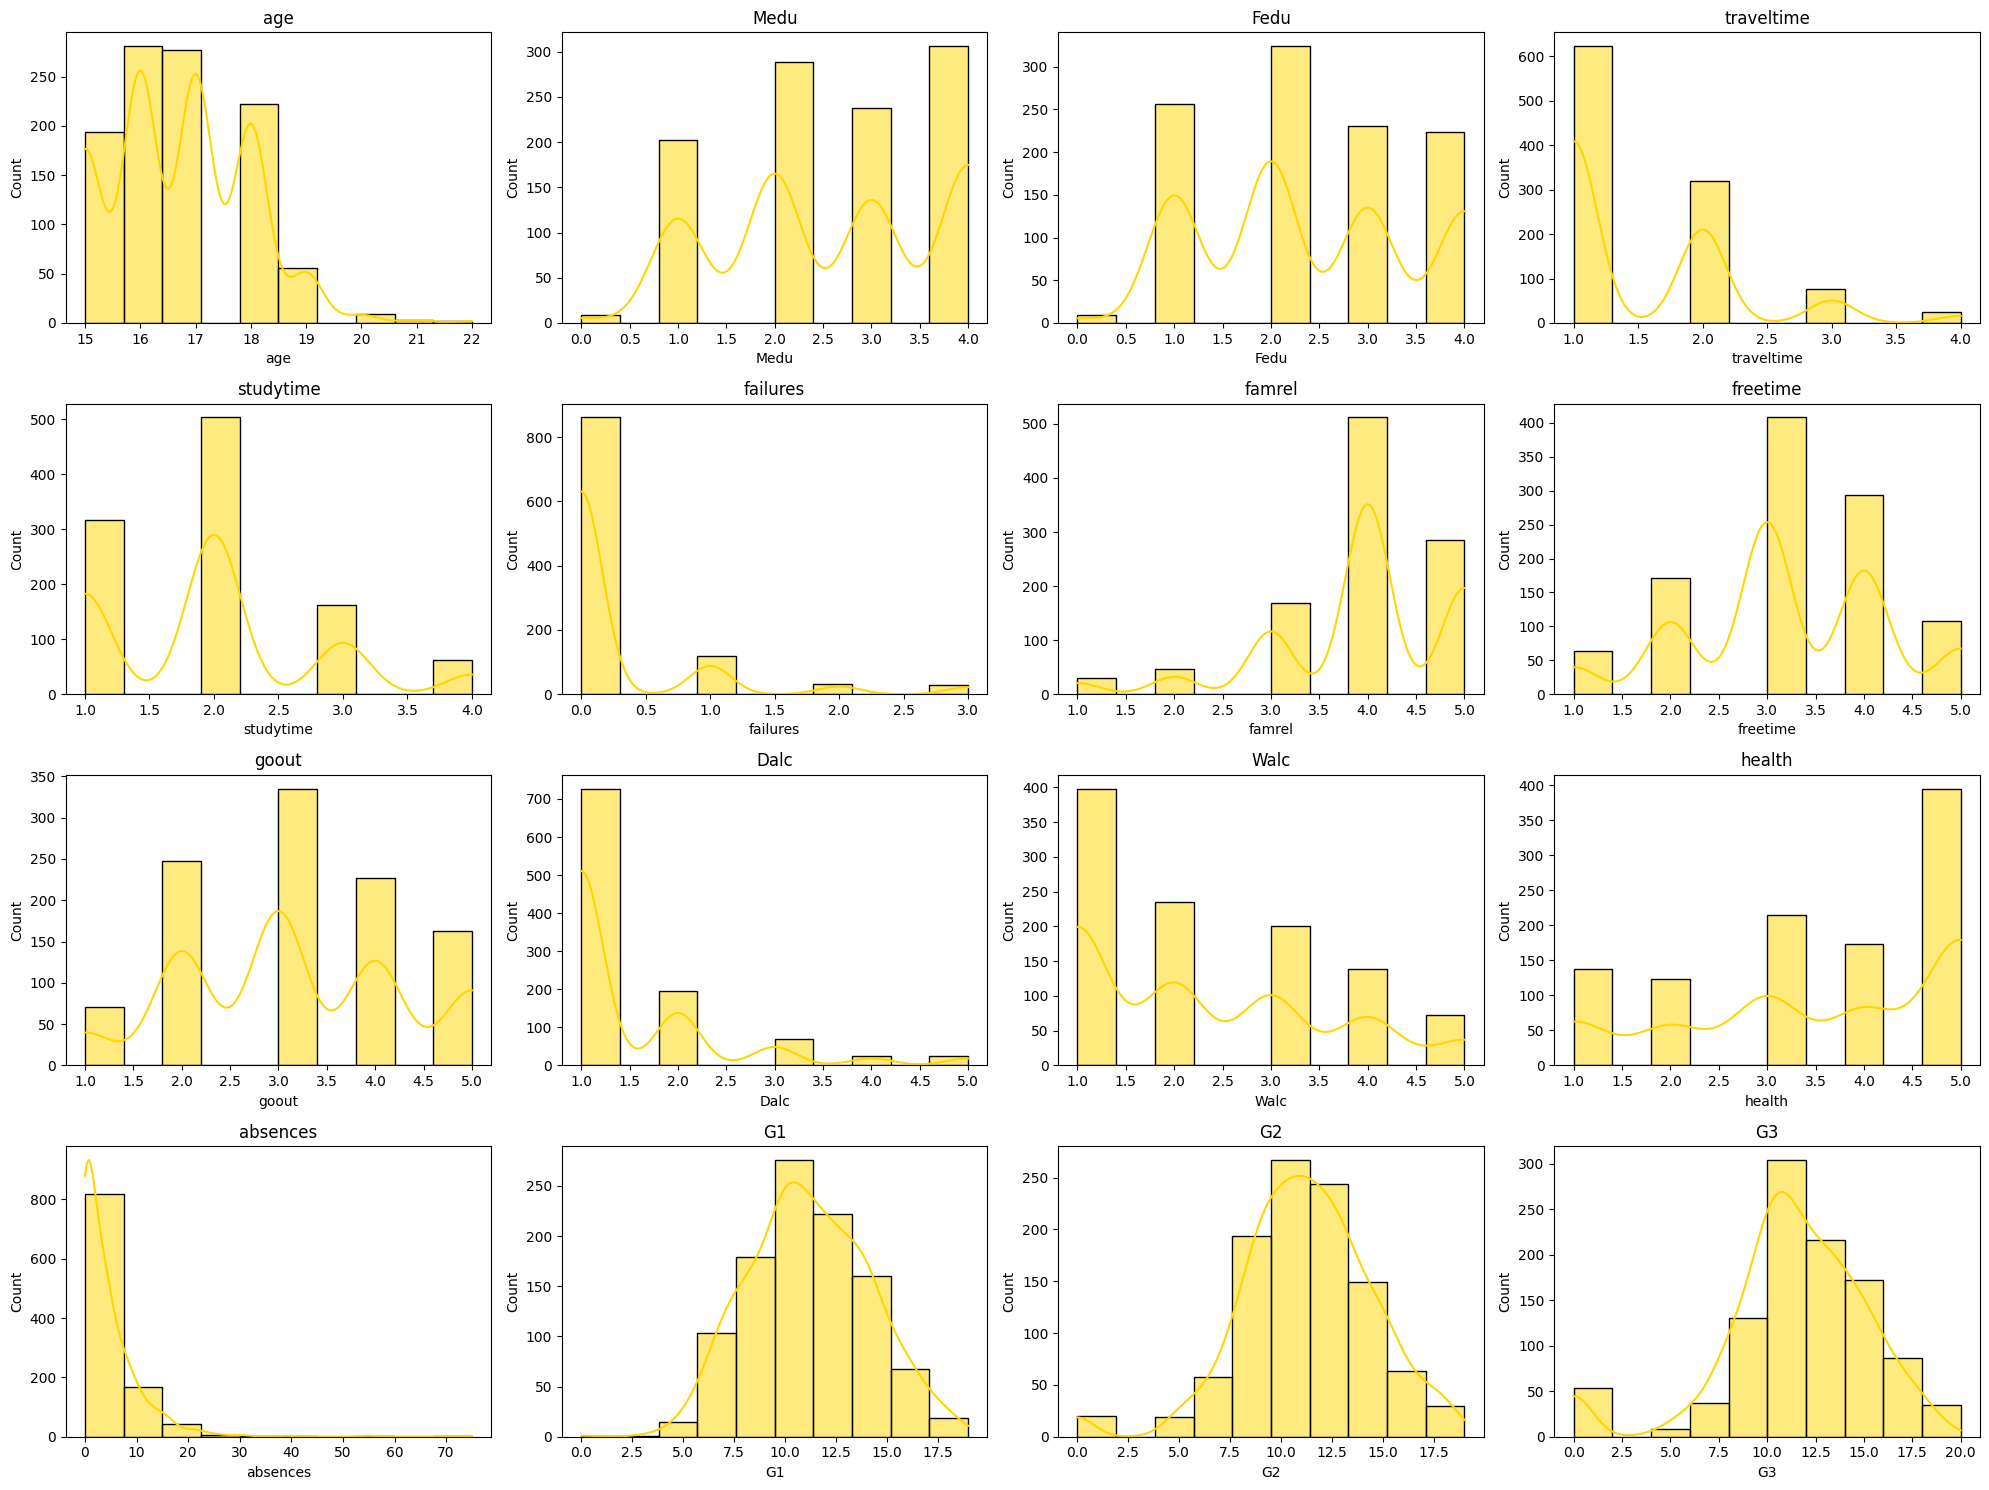

In [77]:
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=10, color='Gold', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Student Grade Distribution


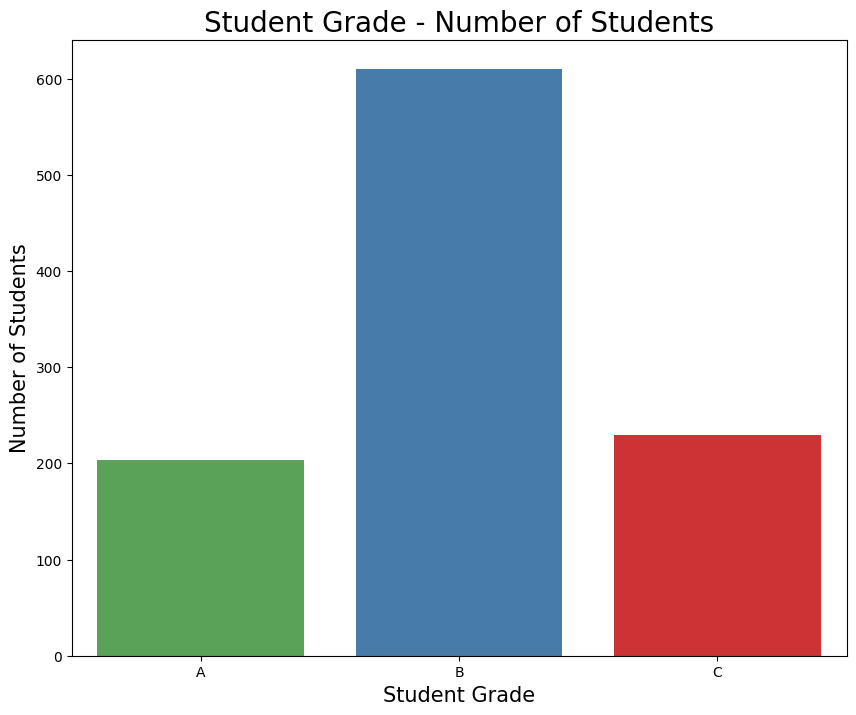

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x='grade', data=df, order=["A","B","C"], palette='Set1', hue='grade')
plt.title('Student Grade - Number of Students', fontsize=20)
plt.xlabel('Student Grade', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)
plt.show()

### Student Age Distribution


### Correlation Heatmap

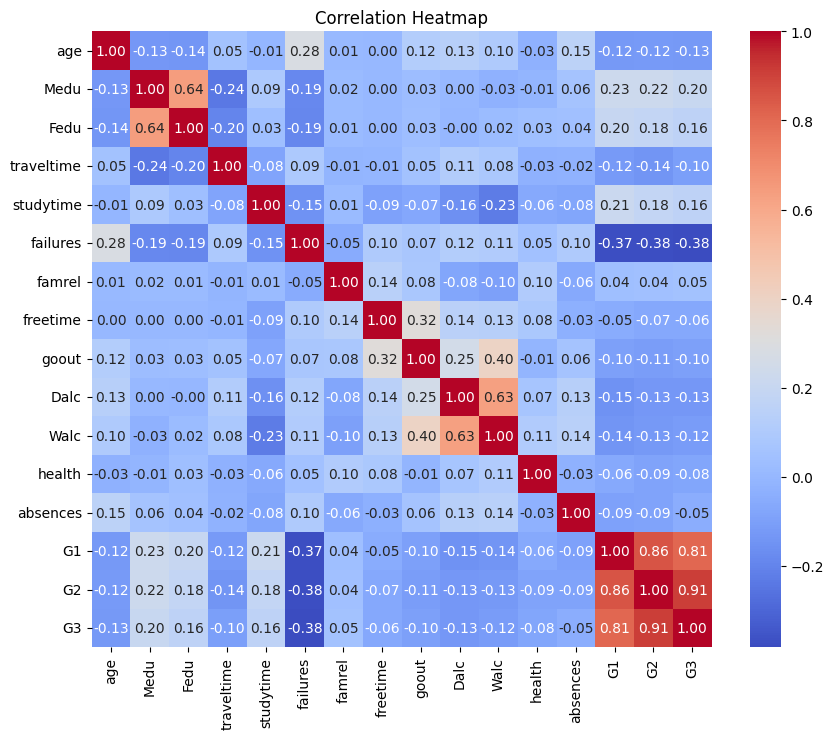

In [84]:
plt.figure(figsize=(10, 8))
correlation = df[columns_to_normalize].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<span style="font-size:24px; font-weight:bold">Student Study Time level Distribution</span>


In [87]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C' 
df.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_norm,Medu_norm,Fedu_norm,traveltime_norm,studytime_norm,failures_norm,famrel_norm,freetime_norm,goout_norm,Dalc_norm,Walc_norm,health_norm,absences_norm,G1_norm,G2_norm,G3_norm,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.263158,0.315789,0.30,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.263158,0.263158,0.30,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.368421,0.421053,0.50,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.789474,0.736842,0.75,A
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.315789,0.526316,0.50,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,0.000000,0.25,0.25,0.333333,1.000000,0.333333,0.50,0.00,0.25,0.00,0.00,0.00,0.026667,0.368421,0.526316,0.50,B
96,GP,M,16,R,GT3,T,4,3,services,other,reputation,mother,2,1,0,yes,yes,no,yes,no,yes,yes,no,3,3,3,1,1,4,2,11,15,15,0.142857,1.00,0.75,0.333333,0.000000,0.000000,0.50,0.50,0.50,0.00,0.00,0.75,0.026667,0.578947,0.789474,0.75,A
97,GP,F,16,U,GT3,T,2,1,other,other,course,mother,1,2,0,no,yes,yes,no,yes,yes,no,yes,4,3,5,1,1,5,2,8,9,10,0.142857,0.50,0.25,0.000000,0.333333,0.000000,0.75,0.50,1.00,0.00,0.00,1.00,0.026667,0.421053,0.473684,0.50,B
98,GP,F,16,U,GT3,T,4,4,other,other,reputation,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,2,1,6,11,14,14,0.142857,1.00,1.00,0.000000,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,0.00,0.080000,0.578947,0.736842,0.70,B


<Figure size 1400x1000 with 0 Axes>

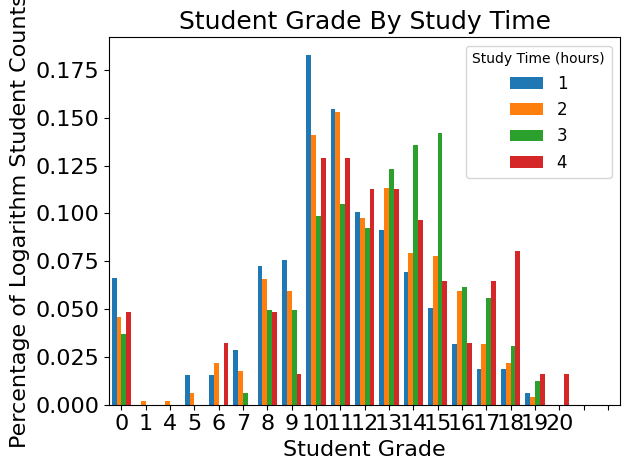

In [103]:
import pandas as pd

# Use raw string (r"") for Windows paths
path = r"C:\Users\andre\Documents\SET 393-Data Mining and Business Intelligence\Student Performance Mining Project"

# Load files - adjust filenames if different
dfMat = pd.read_excel("student_mat_cleaned.xlsx")
dfPor = pd.read_excel("student_portuguese_cleaned.xlsx")

df = pd.concat([dfMat, dfPor])

# Create a cross-tabulation of grades vs study time
studytime_tab = pd.crosstab(df['G3'], df['studytime'])

# Calculate percentages
perc = (lambda col: col / col.sum())
studytime_perc = studytime_tab.apply(perc)

# Create the plot
plt.figure(figsize=(14, 10))  # Large figure size as in your example
studytime_perc.plot.bar(fontsize=16, width=0.8)

# Customize the plot to match your screenshot style
plt.title('Student Grade By Study Time', fontsize=18)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.legend(title='Study Time (hours)', fontsize=12)

# Ensure all grades from 0-20 are shown
plt.xticks(ticks=range(0, 21), rotation=0)
plt.xlim(-0.5, 20.5)

plt.tight_layout()
plt.show()

<span style="font-size:24px; font-weight:bold">Student Grade By Internet Status</span>

In [105]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C'

<Figure size 640x480 with 0 Axes>

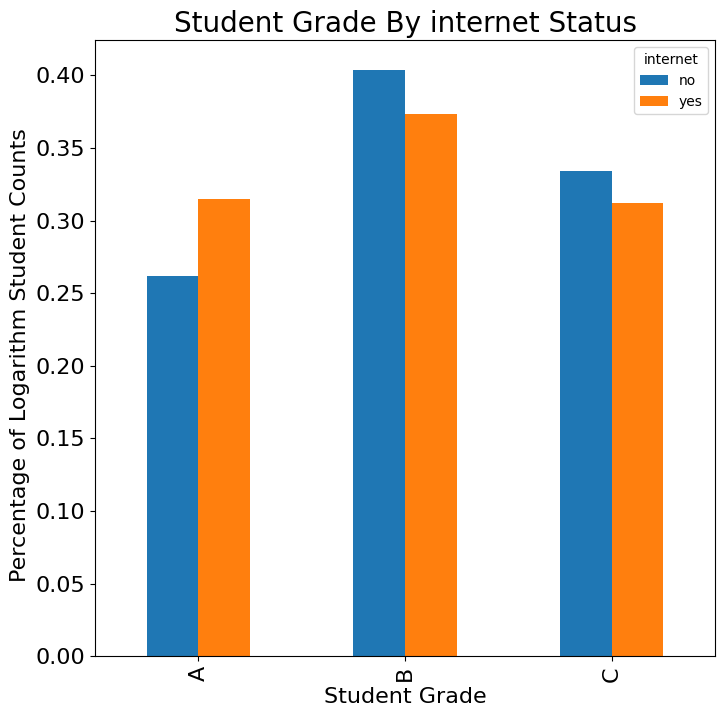

In [107]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
internet_tab1 = pd.crosstab(index=df.grade, columns=df.internet)
internet_tab = np.log(internet_tab1)
internet_perc = internet_tab.apply(perc).reindex(index)
plt.figure()
internet_perc.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Student Grade By internet Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts  ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

### Student Grade By Alcohol Consumption

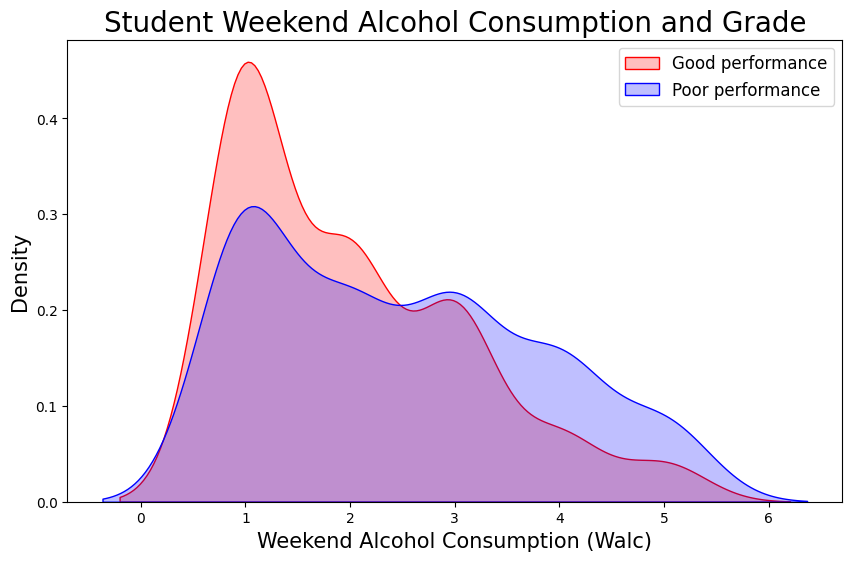

In [110]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.grade, columns=df.Walc)
alc_tab = np.log(alc_tab1 + 1)  # Adding 1 to avoid log(0)

# Calculate percentages (row-wise)
alc_perc = alc_tab.div(alc_tab.sum(axis=1), axis=0) * 100

# create good student dataframe
good = df.loc[df.grade == 'A'].copy()
good = good[~good.index.duplicated()]

poor = df.loc[df.grade == 'C'].copy()
poor = poor[~poor.index.duplicated()]

plt.figure(figsize=(10,6))
p1 = sns.kdeplot(data=good['Walc'], fill=True, color="r", label='Good performance')
p1 = sns.kdeplot(data=poor['Walc'], fill=True, color="b", label='Poor performance')
plt.title('Student Weekend Alcohol Consumption and Grade', fontsize=20)
plt.ylabel('Density', fontsize=15)
plt.xlabel('Weekend Alcohol Consumption (Walc)', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Weekend alcohol consumption affects grade very much.

### Student Grade By Parents Education Level

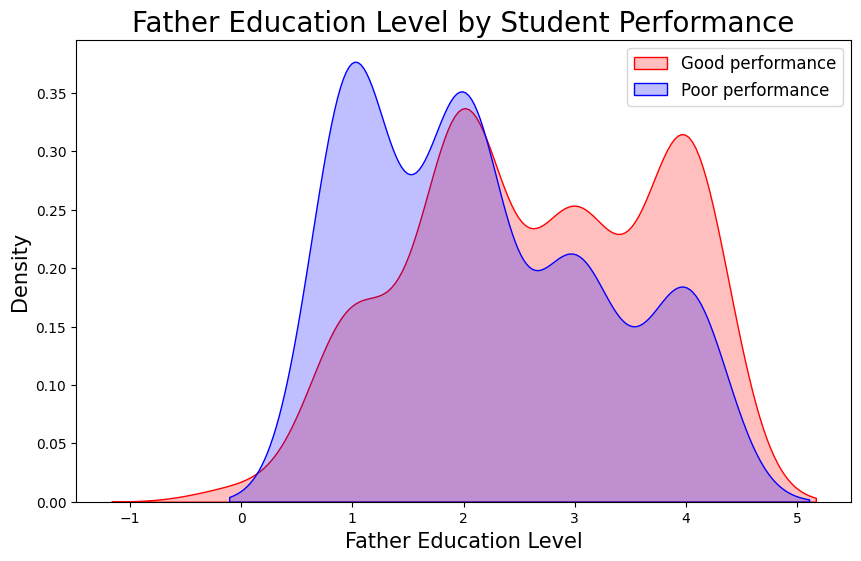

In [114]:
plt.figure(figsize=(10,6))
p2 = sns.kdeplot(data=good['Fedu'], fill=True, color="r", label='Good performance')
p2 = sns.kdeplot(data=poor['Fedu'], fill=True, color="b", label='Poor performance')
plt.title('Father Education Level by Student Performance', fontsize=20)
plt.xlabel('Father Education Level', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(fontsize=12)
plt.show()

<Figure size 640x480 with 0 Axes>

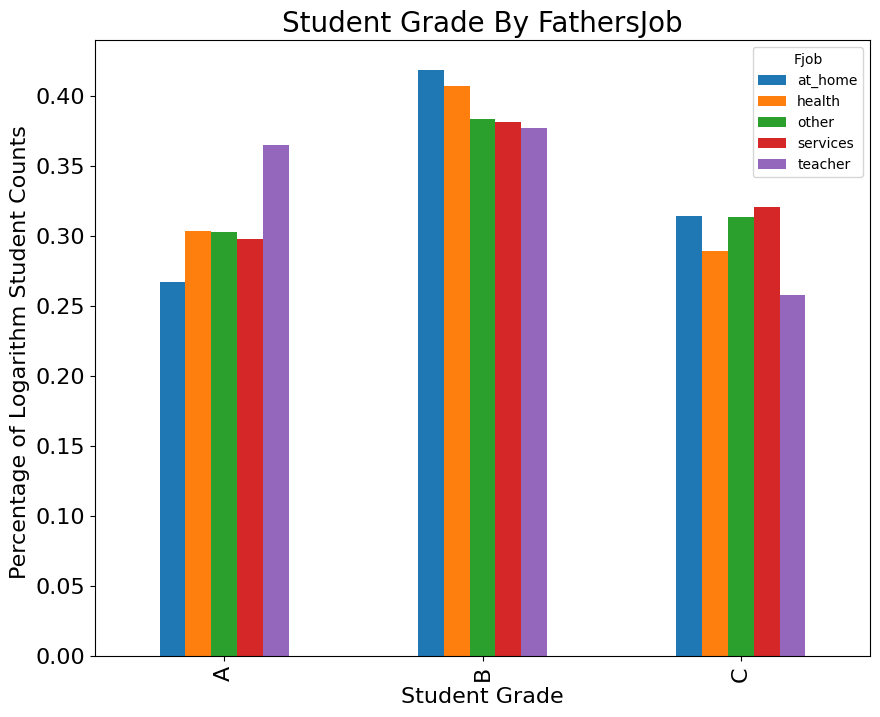

In [116]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.Fjob)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(10,8))
plt.title('Student Grade By FathersJob', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

<Figure size 640x480 with 0 Axes>

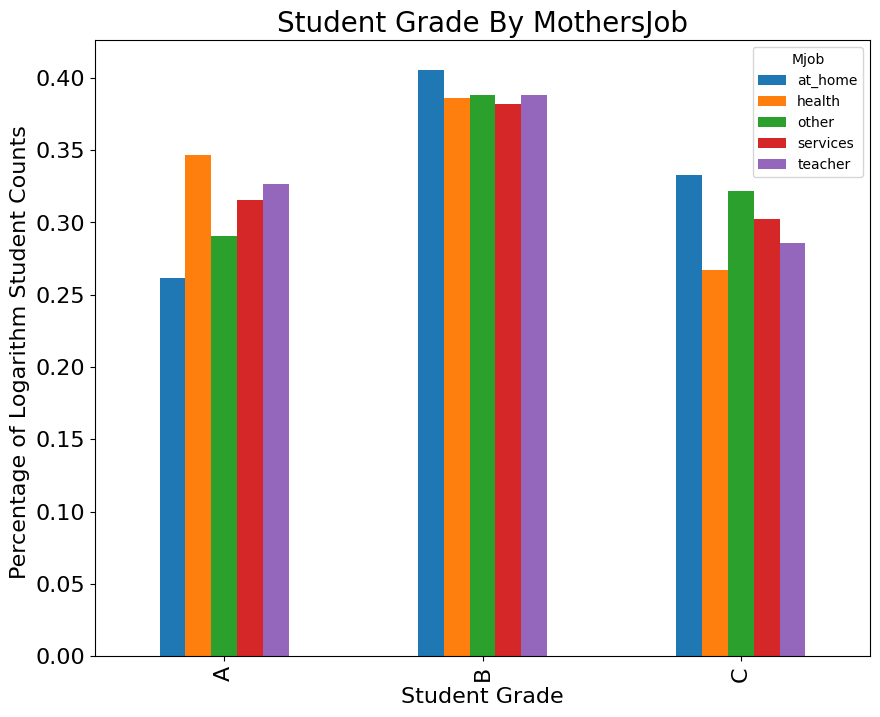

In [118]:
perc = (lambda col: col/col.sum())
index = ['A','B','C']
romance_tab1 = pd.crosstab(index=df.grade, columns=df.Mjob)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(fontsize=16, figsize=(10,8))
plt.title('Student Grade By MothersJob', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student Grade', fontsize=16)
plt.show()

- Mothers' eduction level has a much better influence on kids performance.
- For those students who got an A, the job category of their fathers most is the teacher.
- For those students who got an A, their mothers' job category is most in the health field.

## Data Classification Models

In [122]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C' 
df.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,A
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,B
96,GP,M,16,R,GT3,T,4,3,services,other,reputation,mother,2,1,0,yes,yes,no,yes,no,yes,yes,no,3,3,3,1,1,4,2,11,15,15,A
97,GP,F,16,U,GT3,T,2,1,other,other,course,mother,1,2,0,no,yes,yes,no,yes,yes,no,yes,4,3,5,1,1,5,2,8,9,10,B
98,GP,F,16,U,GT3,T,4,4,other,other,reputation,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,2,1,6,11,14,14,B


In [124]:
print("Column names in df:", df.columns.tolist())

Column names in df: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'grade']


In [126]:
# Prepare data
dfc = df.copy()

In [128]:
# train_test_split
from sklearn.model_selection import train_test_split
y = dfc.grade
X = dfc.drop(['grade'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [130]:
X_train.shape

(783, 59)

### Decision Tree

In [133]:
def fit_predict_score(name, clf):
    # Fit the model
    clf.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

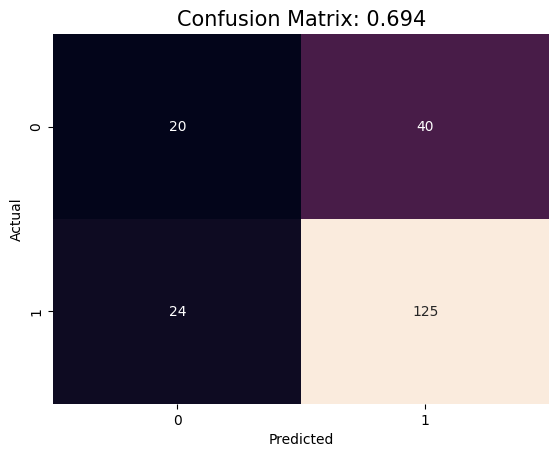

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score
import sklearn.metrics as metrics

# 1. Load your dataset (replace with your actual DataFrame if already loaded)
# df = pd.read_excel("student_data_cleaned.xlsx")  # Example load

# 2. Convert G3 to binary target (e.g., pass/fail)
df['G3_binary'] = (df['G3'] >= 10).astype(int)
y = df['G3_binary']

# 3. Select features (both categorical and numeric)
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

X = df[features]

# 4. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Ensure X_test has same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 7. Initialize and fit model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 8. Make predictions
predictions = clf.predict(X_test)

# 9. Confusion matrix
confusion_matrix = pd.crosstab(index=np.ravel(y_test), columns=predictions.ravel(),
                               rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
accuracy = np.round(accuracy_score(y_test, predictions), 3)
plt.title("Confusion Matrix: " + str(accuracy), fontsize=15)
plt.show()


In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Convert G3 to binary: 1 = pass (G3 >= 10), 0 = fail
df['G3_binary'] = (df['G3'] >= 10).astype(int)

# Feature selection
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
            'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']
X = df[features]
y = df['G3_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display
print(f"Accuracy     = {accuracy:.4f}")
print(f"Error Rate   = {error_rate:.4f}")
print(f"Sensitivity  = {sensitivity:.4f}")
print(f"Specificity  = {specificity:.4f}")
print(f"Precision    = {precision:.4f}")
print(f"F1 Score     = {f1:.4f}")

Accuracy     = 0.7321
Error Rate   = 0.2679
Sensitivity  = 0.8926
Specificity  = 0.3333
Precision    = 0.7688
F1 Score     = 0.8261


In [139]:
from sklearn.tree import DecisionTreeClassifier

# 1. Create the model
dtc = DecisionTreeClassifier(random_state=42)

# 2. Fit it on your training data
dtc.fit(X_train, y_train)

# 3. Now it's safe to evaluate
print("Decision Tree Model Score:", dtc.score(X_train, y_train))
print("Decision Tree Test Score :", dtc.score(X_test, y_test))


Decision Tree Model Score: 0.9916167664670659
Decision Tree Test Score : 0.6794258373205742


In [141]:
# convert G3 to categorical variable 
# A:15~20 B:10~14 C:0~9
df['grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'grade'] = 'A' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'grade'] = 'B' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'grade'] = 'C' 
df.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,C,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,C,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,B,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,A,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10,B,1
96,GP,M,16,R,GT3,T,4,3,services,other,reputation,mother,2,1,0,yes,yes,no,yes,no,yes,yes,no,3,3,3,1,1,4,2,11,15,15,A,1
97,GP,F,16,U,GT3,T,2,1,other,other,course,mother,1,2,0,no,yes,yes,no,yes,yes,no,yes,4,3,5,1,1,5,2,8,9,10,B,1
98,GP,F,16,U,GT3,T,4,4,other,other,reputation,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,2,1,6,11,14,14,B,1


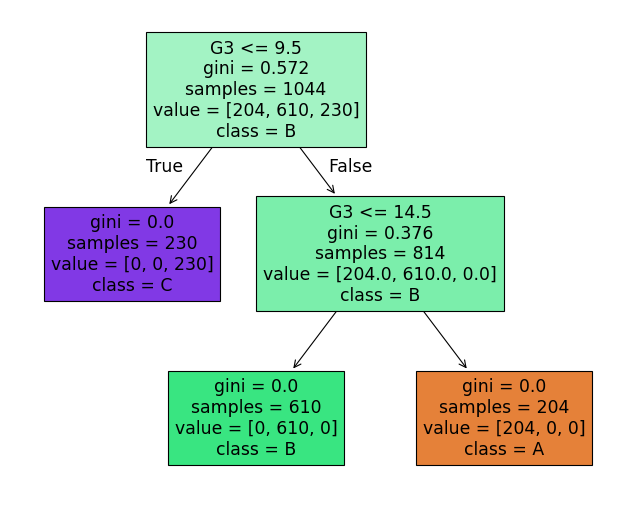

In [143]:
X = df[['G3']]  
y = df['grade']  

# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X, y)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
plot_tree(dtc, 
        feature_names=['G3'],  
        class_names=['A', 'B', 'C'],  
        filled=True)
plt.show()

<span style="font-size:24px; font-weight:bold">Linear Regression</span>

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the data from CSV files
dfMat = pd.read_excel("student_mat_cleaned.xlsx")
dfPor = pd.read_excel("student_portuguese_cleaned.xlsx")

# Combine the dataframes
df = pd.concat([dfMat, dfPor])

# Define the features and target variables
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']
targets = ['G1', 'G2', 'G3']

# Select and scale the features
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and evaluate the model for each target
for target in targets:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f"\n{target}:")
    print("  Train R² Score:", r2_score(y_train, model.predict(X_train)))
    print("  Test  R² Score:", r2_score(y_test, model.predict(X_test)))



G1:
  Train R² Score: 0.21241213740018583
  Test  R² Score: 0.16846293446514815

G2:
  Train R² Score: 0.21712572477495162
  Test  R² Score: 0.13193858786563195

G3:
  Train R² Score: 0.20534682180661923
  Test  R² Score: 0.11089905712877779


<span style="font-size:24px; font-weight:bold">K-Nearest Neighbors </span>

In [151]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data from Excel sheets
dfMat = pd.read_excel("student_mat_cleaned.xlsx")
dfPor = pd.read_excel("student_portuguese_cleaned.xlsx")


# Combine the dataframes
df = pd.concat([dfMat, dfPor])

# Define the features and target variables
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']
targets = ['G1', 'G2', 'G3']

# Select the features
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Iterate over each target variable
for target in targets:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate and print the R² scores
    print(f"\n{target}:")
    print("  Train R² Score:", r2_score(y_train, model.predict(X_train)))
    print("  Test  R² Score:", r2_score(y_test, model.predict(X_test)))
df = pd.concat([dfMat, dfPor])

# Assuming you have defined 'targets' and 'X_scaled' somewhere in your code
for target in targets:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    model = KNeighborsRegressor(n_neighbors=15, weights='distance')
    model.fit(X_train, y_train)

    print(f"\n{target}:")
    print("  Train KNN (R²) Score:", model.score(X_train, y_train))
    print("  Test KNN (R²) Score:", model.score(X_test, y_test))


G1:
  Train R² Score: 0.21241213740018583
  Test  R² Score: 0.16846293446514815

G2:
  Train R² Score: 0.21712572477495162
  Test  R² Score: 0.13193858786563195

G3:
  Train R² Score: 0.20534682180661923
  Test  R² Score: 0.11089905712877779

G1:
  Train KNN (R²) Score: 0.9791510240067406
  Test KNN (R²) Score: 0.21523308220722592

G2:
  Train KNN (R²) Score: 0.9878949815715156
  Test KNN (R²) Score: 0.19006800167441573

G3:
  Train KNN (R²) Score: 0.973388586123465
  Test KNN (R²) Score: 0.11429107152334717


<span style="font-size:24px; font-weight:bold">Support Vector Regressor (SVR) </span>

In [154]:
from sklearn.svm import SVR  
from sklearn.model_selection import train_test_split
import pandas as pd


# Load the data from Excel sheets
dfMat = pd.read_excel("student_mat_cleaned.xlsx")
dfPor = pd.read_excel("student_portuguese_cleaned.xlsx")


# Combine the dataframes
df = pd.concat([dfMat, dfPor])

# Define the features and target variables
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']
targets = ['G1', 'G2', 'G3']

# Select the features
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Iterate over each target variable
for target in targets:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate and print the R² scores
    print(f"\n{target}:")
    print("  Train R² Score:", r2_score(y_train, model.predict(X_train)))
    print("  Test  R² Score:", r2_score(y_test, model.predict(X_test)))
df = pd.concat([dfMat, dfPor])

for target in targets:
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = SVR(kernel='rbf')  
    model.fit(X_train, y_train)

    print(f"\n{target}:")
    print("  Train SVM Score:", model.score(X_train, y_train))
    print("  Test SVM Score:", model.score(X_test, y_test))


G1:
  Train R² Score: 0.21241213740018583
  Test  R² Score: 0.16846293446514815

G2:
  Train R² Score: 0.21712572477495162
  Test  R² Score: 0.13193858786563195

G3:
  Train R² Score: 0.20534682180661923
  Test  R² Score: 0.11089905712877779

G1:
  Train SVM Score: 0.3569421371413458
  Test SVM Score: 0.09739562672242819

G2:
  Train SVM Score: 0.3367178223582604
  Test SVM Score: 0.1156945742939296

G3:
  Train SVM Score: 0.3035643612785349
  Test SVM Score: 0.0985909599004422


<span style="font-size:24px; font-weight:bold">Naive Bayes Classifier </span>

In [157]:
for target in targets:
    y = df[target].round().astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{target}:")
    print(f"  Accuracy Score: {acc:.4f}")



G1:
  Accuracy Score: 0.0813

G2:
  Accuracy Score: 0.0478

G3:
  Accuracy Score: 0.0813


<span style="font-size:24px; font-weight:bold">Logistic Regression </span>

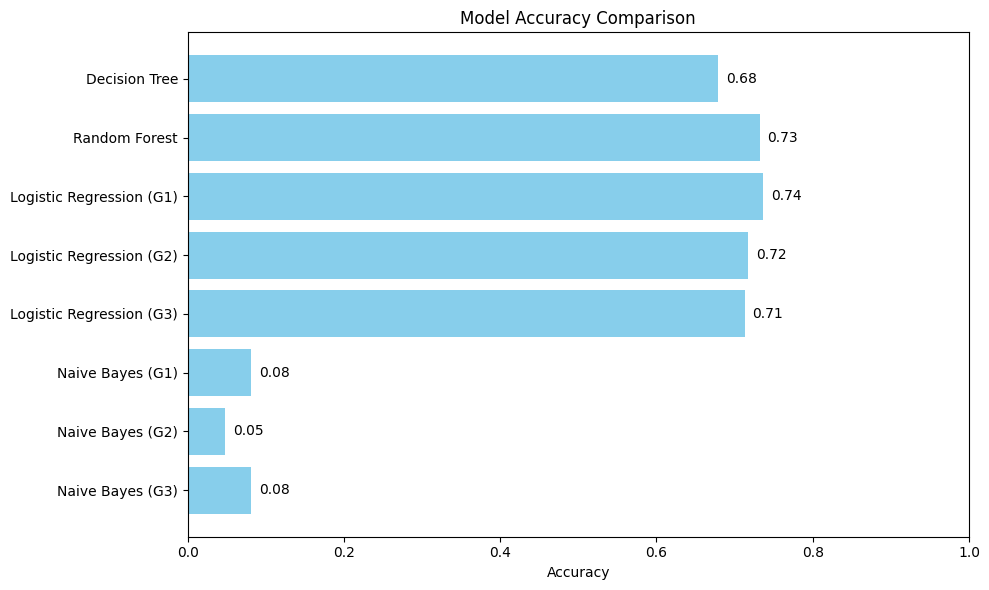

In [160]:
import matplotlib.pyplot as plt

# أسماء النماذج ودقتها
models = [
    "Decision Tree",
    "Random Forest",
    "Logistic Regression (G1)",
    "Logistic Regression (G2)",
    "Logistic Regression (G3)",
    "Naive Bayes (G1)",
    "Naive Bayes (G2)",
    "Naive Bayes (G3)"
]

accuracies = [
    0.6794,  # Decision Tree Test Score
    0.7321,  # Random Forest Accuracy
    0.7368,  # Logistic Regression G1
    0.7177,  # Logistic Regression G2
    0.7129,  # Logistic Regression G3
    0.0813,  # Naive Bayes G1
    0.0478,  # Naive Bayes G2
    0.0813   # Naive Bayes G3
]

# رسم البيانات
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)

# كتابة القيم على الأعمدة
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.gca().invert_yaxis()  # عرض الأعلى أولاً
plt.show()


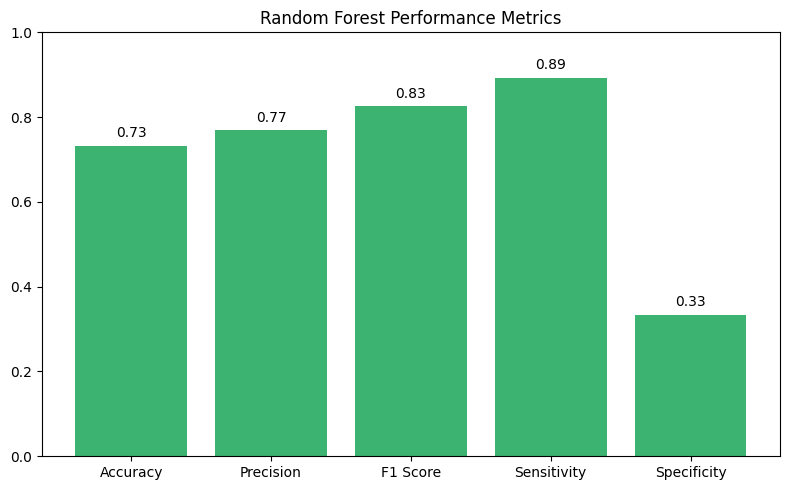

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# المقاييس لنموذج Random Forest
metrics = ['Accuracy', 'Precision', 'F1 Score', 'Sensitivity', 'Specificity']
values = [0.7321, 0.7688, 0.8261, 0.8926, 0.3333]

# رسم العمود المجمع
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color='mediumseagreen')
plt.ylim(0, 1)
plt.title('Random Forest Performance Metrics')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha='center')

plt.tight_layout()
plt.show()


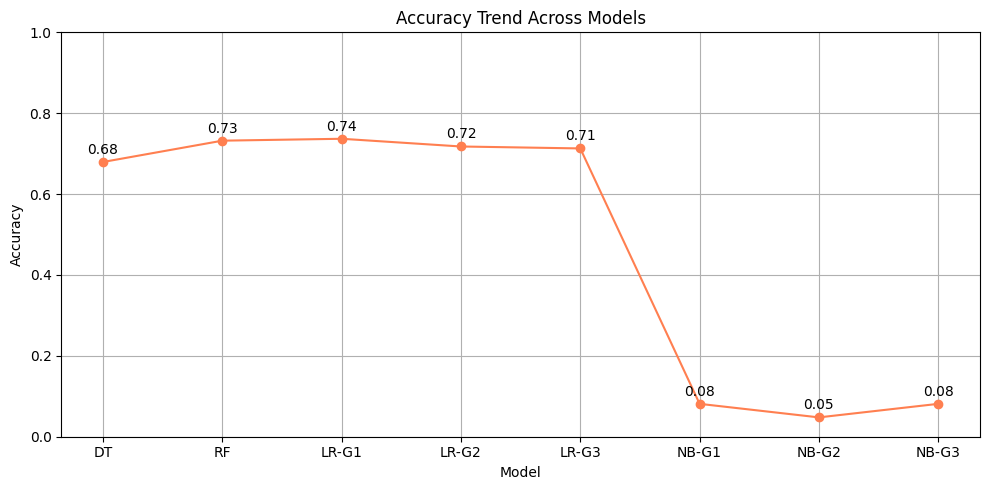

In [165]:
models_short = [
    "DT", "RF", "LR-G1", "LR-G2", "LR-G3", "NB-G1", "NB-G2", "NB-G3"
]
plt.figure(figsize=(10, 5))
plt.plot(models_short, accuracies, marker='o', linestyle='-', color='coral')
plt.title("Accuracy Trend Across Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for i, val in enumerate(accuracies):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center')

plt.grid(True)
plt.tight_layout()
plt.show()


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classification_results = []

for target in ['G1', 'G2', 'G3']:
    y = (df[target] >= 10).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=500, C=100, penalty='l2')
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"\nLogistic Regression for {target} (Pass/Fail ≥ 10):")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy : {test_acc:.4f}")

    classification_results.append({
        'Target': target,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })




Logistic Regression for G1 (Pass/Fail ≥ 10):
  Training Accuracy: 0.7880
  Testing Accuracy : 0.7368

Logistic Regression for G2 (Pass/Fail ≥ 10):
  Training Accuracy: 0.7820
  Testing Accuracy : 0.7177

Logistic Regression for G3 (Pass/Fail ≥ 10):
  Training Accuracy: 0.8168
  Testing Accuracy : 0.7129
